<font size="+3"><b>PCA and Clustering
</b></font>

<font color='Blue'>
The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.
</font>

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [ ]:
# Download the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/236/seeds.zip"

# Unzip wine.data from the downloaded zip file
!unzip -o seeds.zip seeds_dataset.txt

# Remove the downloaded zip file after extraction
!rm -r seeds.zip

--2024-04-09 18:20:35--  https://archive.ics.uci.edu/static/public/236/seeds.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘seeds.zip’

seeds.zip               [ <=>                ]   9.21K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2024-04-09 18:20:35 (33.3 MB/s) - ‘seeds.zip’ saved [9432]

Archive:  seeds.zip
 extracting: seeds_dataset.txt       


In [ ]:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# https://archive.ics.uci.edu/dataset/236/seeds

import pandas as pd

data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']
display(data)

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Principle Component Analysis (PCA)

### 1.1 Preprocessing (3 Points)

- **Split the data into X and y** (0.5 Point)
  - Assign the features to `X` and the target variable to `y`.

- **Stratified Split of X and y into Train and Test Sets** (0.5 Point)
  - Utilize stratification to ensure representative distribution of classes while splitting.

- **Plot Train and Test Proportions in a Pie Chart** (2 Points)
  - The pie chart should include:
    - Labels indicating 'Training Set' and 'Test Set'.
    - A title for the chart.
    - Proportion percentages for the Training and Test sets displayed on each slice of the pie.
    - The number of entries within the Training and Test sets shown below the corresponding percentage.

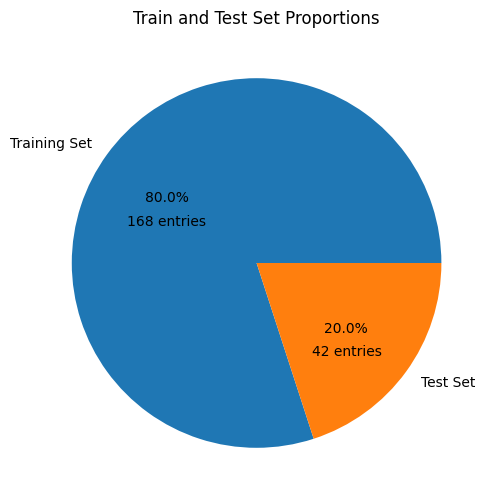

In [ ]:
# 1.1
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split data into X and y
X = data.drop('Type', axis = 1)
y = data['Type']

# Stratified split of X and y into train and test sets (referenced documentation for stratify info: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

# Instantiate wedge sizes and labels
train_size = len(X_train)
test_size = len(X_test)
labels = ['Training Set', 'Test Set']
sizes = [train_size, test_size]

# Plot proportions in a pie chart (referenced documentation for plt.pie: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)
plt.figure(figsize = (6, 6))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%') # autopct shows proportion percentages on each slice

# Create title for chart
plt.title('Train and Test Set Proportions')

# Show the number of entries within the sets below the corresponding percentage
# Referenced documentation for annotate: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html
plt.annotate(f'{train_size} entries', xy = (-0.7, 0.2))
plt.annotate(f'{test_size} entries', xy = (0.3, -0.5))

plt.show()


<font color='Green'><b>Answer:</b></font>

- **1.1** The pie chart clearly shows that 20% of the 210 data entries are used in the test set (42 entries) while 80% of the data is used for training (168 entries).

### 1.2 Scaling the Data (2 Points)

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

- **Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)


<font color='Green'><b>Answer:</b></font>

**1.2**

I would select the Robust Scaler for this dataset because the data is described as multivariate and real-valued, which means it likely has a range of distributions. It could also contain outliers considering the fact there are biological and geometrical measurements involved, and Robust Scaler is designed to be robust to outliers since it uses the median and interquartile range for scaling, unlike other scalers like Standard Scaler and Min Max Scaler. Robust Scaler is also easily adaptable to data without a normal distribution, unlike Standard Scaler, so it would avoid assumptions about the data distribution.

### 1.3 Model Selection and Justification (2 Points)

- **Choose an Appropriate Machine Learning Model**:
  - Identify the model that you believe is most suitable for the dataset.
  - Provide a justification for your choice based on the dataset's characteristics.

In [ ]:
# 1.3
from sklearn.svm import SVC

# Instantiate SVC model
model = SVC(random_state = 0)

<font color='Green'><b>Answer:</b></font>

**1.3**

I believe that the SVC model would be most suitable for this dataset. As discussed in class, Support Vector Machine models allow for complex decision boundaries and work well on high-dimensional data; therefore, for this dataset containing multivariate (high-dimensional) and real-valued measurements, SVC would be able to effectively find the optimal hyperplane that separates classes in the feature space. In addition, the kernel trick allows the SVC model to better handle nonlinear relationships between features. Not only this, but after preprocessing the data with a Robust Scaler, SVC would work very well against outliers and make the measurements on similar scales.

### 1.4 Hyperparameter Optimization with Grid Search (3 Points)

- **Set Up the Grid Search**:
  - Construct a pipeline that incorporates the selected scaler from part 1.2 to standardize the data.
  - Execute a grid search within this pipeline to identify the best hyperparameter settings for your chosen model.
  - Provide a broad and varied range of hyperparameter values to ensure a thorough search.


In [ ]:
# 1.4
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Construct the pipeline
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('svc', model)
])

# Set up parameter grid
svc_param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__gamma': [0.01, 0.1, 1, 10, 100]
}

# Execute grid search
svc_grid_search = GridSearchCV(pipeline, svc_param_grid, cv = 5)

# Fit the model
svc_grid_search.fit(X_train, y_train)

# Find and print the best parameters for the model; I also found the best score to compare performance later
best_params_svc = svc_grid_search.best_params_
print("SVC Model", "Best Parameters:", best_params_svc)

best_score_svc = svc_grid_search.best_score_
print("SVC Model", "Best Score:", best_score_svc)

SVC Model Best Parameters: {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}
SVC Model Best Score: 0.946524064171123


<font color='Green'><b>Answer:</b></font>

**1.4**
- SVC Model Best Parameters: {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}
- SVC Model Best Score: 0.946524064171123

### 1.5 Dimensionality Reduction and Model Optimization (6 Points)

- **Dimensionality Reduction Choice** (2 Points):
  - Choose between PCA and t-SNE for reducing the dataset to two dimensions.
  - Justify your selection based on the characteristics of the seeds dataset.

- **Implement Dimensionality Reduction** (2 Points):
  - Apply the chosen dimensionality reduction technique to the seeds dataset.
  - Reduce the dataset to two dimensions as required.

- **Model Optimization on Reduced Data** (2 Points):
  - Redo the grid search from part 1.4 using the two-dimensional data.
  - Compare the model's performance with the original higher-dimensional data.

In [ ]:
# 1.5
# Referenced lab 8 and class notes for information about PCA
from sklearn.decomposition import PCA

# Initialize PCA to reduce dataset to 2 dimensions
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Execute grid search and fit with the updated dataset
svc_grid_search_pca = GridSearchCV(pipeline, svc_param_grid, cv = 5, n_jobs = -1)
svc_grid_search_pca.fit(X_train_pca, y_train)

# Find and print the best parameters for the model; I also found the best score to compare performance
best_params_svc_pca = svc_grid_search_pca.best_params_
print("SVC Model with PCA", "Best Parameters:", best_params_svc_pca)

best_score_svc_pca = svc_grid_search_pca.best_score_
print("SVC Model", "Best Score:", best_score_svc_pca)

SVC Model with PCA Best Parameters: {'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}
SVC Model Best Score: 0.8875222816399286


<font color='Green'><b>Answer:</b></font>

**1.5**

- Based on the correlation matrix created below, I noticed that the majority of features are highly correlated; therefore, I chose PCA because of its ability to recognize linear combinations between the features. I also chose PCA to reduce the dataset to two dimensions because of its efficiency and its ability to preserve global variance while still simplifying the data, as opposed to t-SNE which focuses on the local structure and is more computationally intensive. As discussed in class, PCA retains most of the variation present in all original variables, which is important for the high-dimensional seeds dataset with geometric measurements that imply the presence of linear relationships among features. In addition, PCA is more computationally efficient and suitable to quickly perform processing for this high-dimensional dataset.

- In comparison with the model fit with with the original higher-dimensional data (score = 0.946524064171123), the model with dimensionality reduction performed slightly worse with a score of 0.8875222816399286. This shows the downside of dimensionality reduction being the tradeoff between complexity and information retention, as discussed in class. Reducing the dimensions from 7 to 2 clearly caused some valuable information to be lost, resulting in a lower accuracy score; however, the PCA model still performed quite well despite being less complex with only two dimensions. The only difference between the best parameters for each model was the fact that the model with PCA needed a higher regularization parameter C (100 instead of 10), which makes sense since the lower dimensionality requires a more complex decision boundary to classify the data more accurately.

<Axes: >

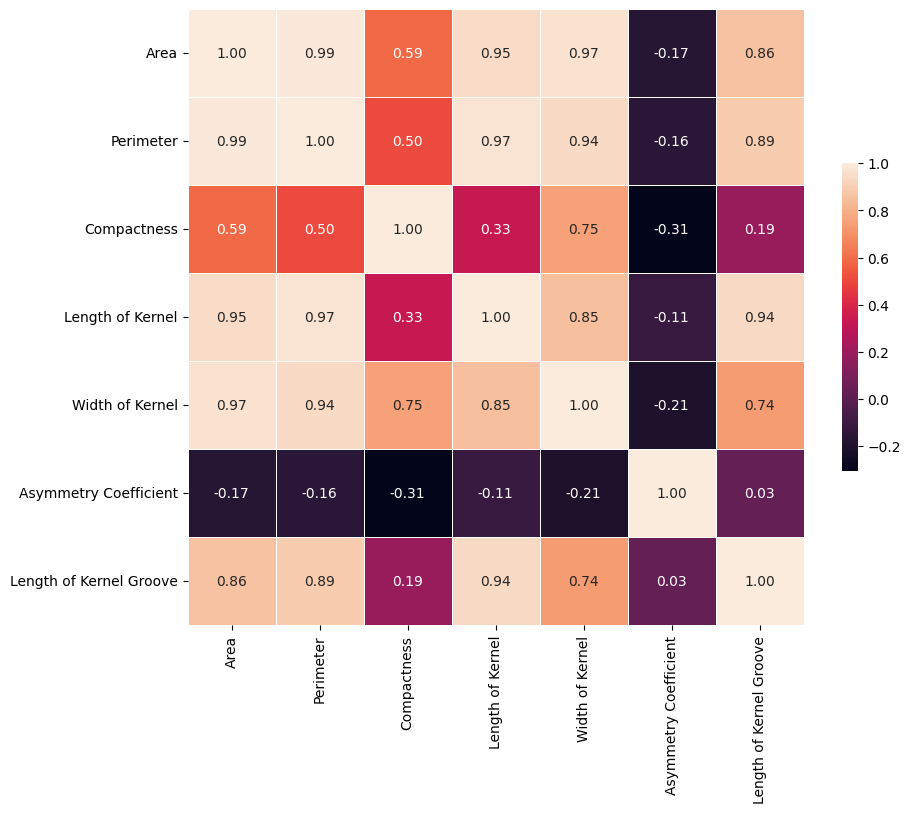

In [ ]:
# Correlation matrix to justify use of PCA

import seaborn as sns
import matplotlib.pyplot as plt

# Calculated the correlation matrix
corr_matrix = X_train.corr()

# Generated a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", square = True,
            cbar_kws = {'shrink': .5}, linewidths = .5, annot_kws = {'size': 10})


### 1.6 Visualizing Reduced Dimensionality Data (2 Points)

- **Create a 2D Scatter Plot for Training and Testing Sets**:
  - Generate 1-row-two-column subplots for scatter plots for the two-dimensional training and testing data obtained from part 1.5.
  - Clearly label the x-axis and y-axis for both plots.
  - Include a legend in each plot that distinctly represents the distribution of the three classes (you can use different shapes and colors to represent different classes).

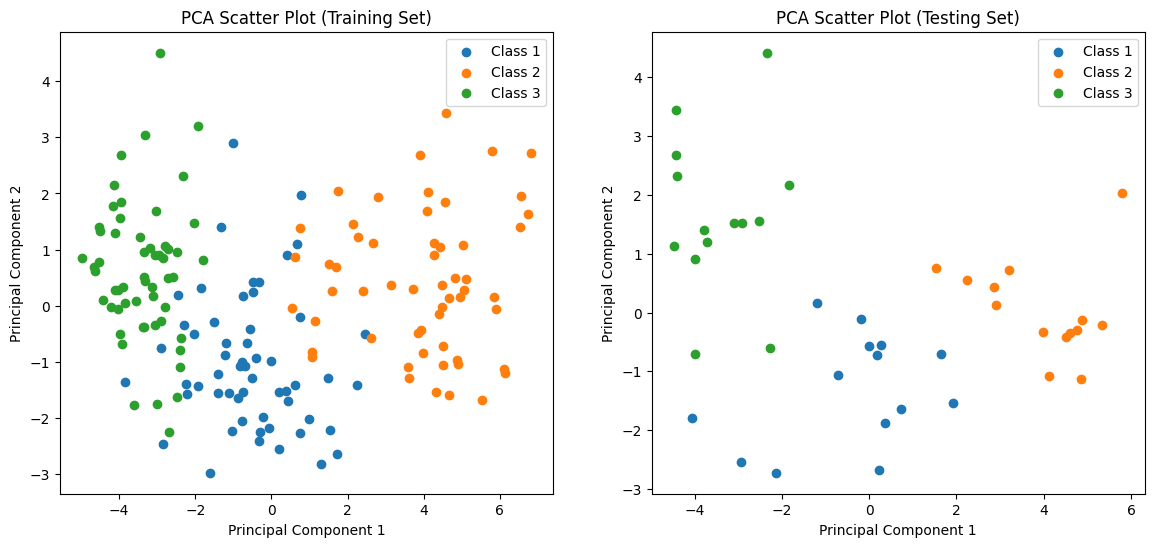

In [ ]:
# 1.6
# Referenced lab 8 to help with scatter plot
import numpy as np

# Generate 1-row-two-column subplots
fig, axs = plt.subplots(1, 2, figsize = (14, 6))

# Scatter plot for training set
classes = np.unique(y_train)
for i, cl in enumerate(classes):
    axs[0].scatter(X_train_pca[y_train == cl, 0], X_train_pca[y_train == cl, 1], label = f'Class {cl}')
axs[0].set_title("PCA Scatter Plot (Training Set)")
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].legend()

# Scatter plot for testing set
for i, cl in enumerate(classes):
    axs[1].scatter(X_test_pca[y_test == cl, 0], X_test_pca[y_test == cl, 1], label = f'Class {cl}')
axs[1].set_title("PCA Scatter Plot (Testing Set)")
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].legend()

plt.show()


## 2. Clustering and Visualization of the Seeds Dataset

### 2.1 Create a Pipeline for Scaling and K-Means Clustering (3 Points)

- Construct a pipeline that includes a scaler and the K-Means clustering algorithm.
- Use the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Explain the results of the `KelbowVisualizer`.

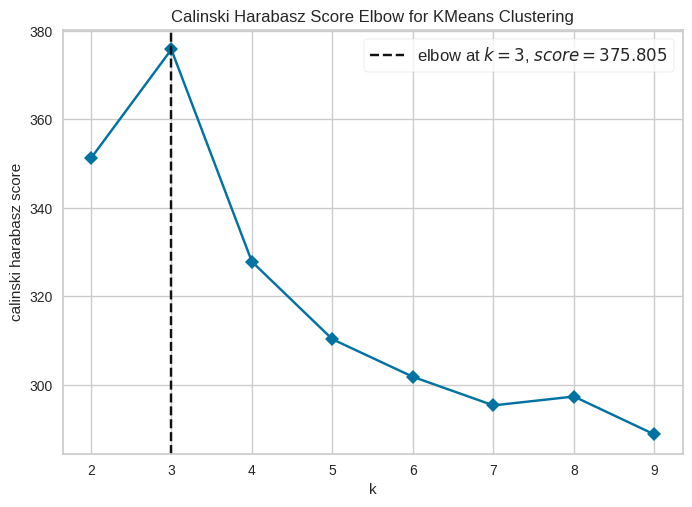

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
# 2.1
# Referenced lab 8 for K-Means clustering algorithm import statement
# Referenced documentation for KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# Referenced documentation for KelbowVisualizer: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Constructed pipeline with a scaler and the K-Means clustering algorithm
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_init = 10, random_state = 0))
])

# Instantiate the visualizer
visualizer = KElbowVisualizer(pipeline.named_steps['kmeans'], k = (2,10), metric = 'calinski_harabasz', timings = False)

# Fit the data to the visualizer
visualizer.fit(X)
visualizer.show()


<font color='Green'><b>Answer:</b></font>

**2.1**

The KElbowVisualizer displays an elbow at k = 3 and a score of 375.805. The elbow at k = 3 indicates the point right before the Calinski-Harabasz starts to diminish and this represents the optimal number of clusters for the data. The value k = 3 makes sense for this data because there are 3 classes of wheat varieties. The Calinski-Harabasz score represents the ratio of within to between cluster dispersion, and the score is 375.805 which is quite high compared to the scores of the other k values present in the class. This separation indicates that the clusters at the elbow are well-separated and more dense compared to other values of k.

### 2.2 Label the Data Using the Optimal Number of Clusters (2 Points)
- Label the training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found in part 2.1.

In [ ]:
# 2.2

# Constructed pipeline with a scaler and the K-Means clustering algorithm with optimal k = 3 from 2.1
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters = 3, n_init = 10, random_state = 0))
])

# Fit the pipeline to the training data
pipeline.fit(X_train)

# Used the fitted pipeline to predict cluster labels for the training data
cluster_labels = pipeline.predict(X_train)


### 2.3 Dimensionality Reduction Using PCA (2 Points)
- Apply PCA to reduce the dimensionality of the dataset to 2D.

In [ ]:
# 2.3

# Initialize PCA to reduce dataset to 2 dimensions
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)


#### 2.4 Plot the 2D Data with Cluster Labels (3 Points)
- Create a 2D scatter plot of the PCA-reduced data.
- Color the points using the labels obtained from K-Means clustering.

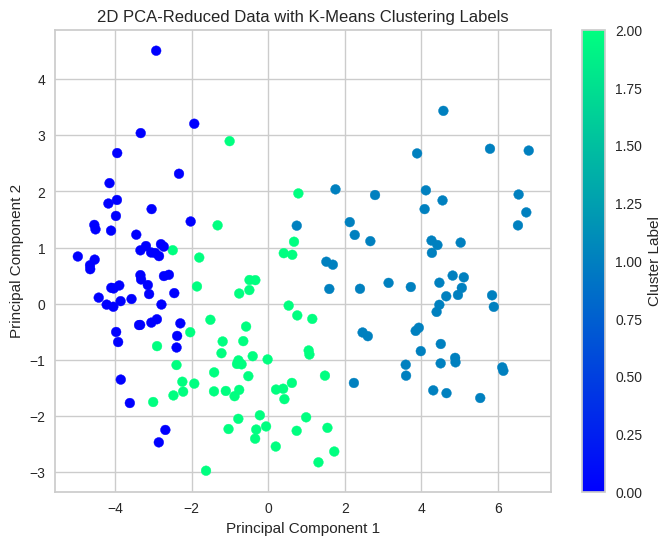

In [ ]:
# 2.4

# Scatter plot for the PCA-reduced data and colored points based on K-Means cluster labels
plt.figure(figsize = (8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = cluster_labels, cmap = 'winter')
# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = cluster_colors)

# Added plot title and labels
plt.title('2D PCA-Reduced Data with K-Means Clustering Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Added a color bar to indicate cluster labels
plt.colorbar(label = 'Cluster Label')

plt.show()


## Bonus Question: Interpretation of Clustering Results (2 Points)

- **Analyze and Interpret the Clustering Outcome**:
  - Based on the 2D PCA plot with K-Means clustering labels from part 2.4, provide an interpretation of the clustering results.
  - Discuss any patterns or insights observed from the plot, considering the distribution and overlap of clusters.

<font color='Green'><b>Answer:</b></font>

**Bonus Question**

- The clustering results in part 2.4 show a pretty clear separation of the 3 distinct clusters, with no major outliers placed in the wrong cluster; however, there is some slight overlap between the purple and teal clusters and the yellow cluster at the edges. This overlap could indicate that there may be some shared characteristics between clusters, or that using PCA for dimensionality reduction could have resulted in a loss of information that would have helped better classify certain points. In addition, some clusters are more dense than others, specifically the purple cluster seems to be the most dense while the teal cluster seems to be the most spread out. These density differences imply a difference in variance within each cluster. Some points seem to be far from the centroids of their clusters and could be investigated further as well. Overall, it is clear that clustering was quite effective in determining the presence of the 3 classes of wheat varieties.